In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
plt.style.use('default')

df=pd.read_csv('/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_hour.csv',header=0,delimiter='\t', parse_dates=['datetime'])
df=df.set_index(['datetime'])
df['gasPower']=df['gasPower']*10
dwelling_id = 'P01S01W8655'

In [2]:
sample_rate = '1H'
def resample_df(df, sample_rate, combine_all_dwellings=False):
    """
    Resampled a (un)processed dataframe to the specified sample_rate.
    Input is a (un)processed df.
    Input df may also be multiple dwelling dfs combined.
    Sample rate must be a string. 
    For example '1H', '1D', '60s'.
    
    Combine all dwellings: resamples the df and ignores the fact that there are unique dwellings.
    
    TODO: add std to ePower, gasPower when combine_all_dwellings=False
    """
    def resample_dwelling(df, sample_rate, dwelling_id):
        df = df.resample(sample_rate).mean() # resample to rest by mean
        df['dwelling'] = dwelling_id
        return df
        
                      
    resampled_dwellings = []
    
    if combine_all_dwellings: # Ignore dwelling_ids
        df = df.drop(['eMeter', 'eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'gasMeter'], axis=1) # Drop columns because they are meaningless when ignoring dwelling ids
        resampled_df = resample_dwelling(df, sample_rate, 'All dwellings')
        resampled_dwellings.append(resampled_df)
    else:
        dwellings = df['dwelling'].unique() # Get dwelling ids
        for dwelling_id in tqdm(dwellings):
            dwelling_df = df[df['dwelling'] == dwelling_id] # Get the data from only that dwelling_id
            resampled_dwelling = resample_dwelling(dwelling_df, sample_rate, dwelling_id)
            resampled_dwellings.append(resampled_dwelling)
    
    resampled_df = pd.concat(resampled_dwellings)
    
    return resampled_df

rdf=resample_df(df,sample_rate)
trdf = rdf[rdf['T'] < 16]

100%|██████████| 1/1 [00:00<00:00, 120.86it/s]


In [3]:
rdf = rdf.reset_index()
rdf=rdf[np.isfinite(rdf['gasPower'])]
trdf=trdf[np.isfinite(trdf['gasPower'])]

In [4]:
rdf['T-1'] = rdf['T'].shift(1)

In [5]:
rdf

,datetime,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,...,SQ,T,T10,TD,U,VV,WW,gasPower,dwelling,T-1
1,2017-04-24 13:00:00,778.207,0.0,736.961,0.0,148.48604,0.0,1591.658,252.86667,58.0,...,0.513033,12.766666,13.850000,6.533333,65.333336,36050.0000,32.666668,0.000000,P01S01W8655,NaN
2,2017-04-24 14:00:00,778.418,0.0,736.961,0.0,214.16338,0.0,1591.658,259.85000,0.0,...,1.507850,12.800000,14.266666,6.483334,65.000000,40366.6680,5.500000,0.000000,P01S01W8655,12.766666
3,2017-04-24 15:00:00,778.570,0.0,736.961,0.0,151.11765,0.0,1591.658,263.51666,0.0,...,0.000000,12.400000,13.633333,6.600000,67.333336,34000.0000,2.000000,0.000000,P01S01W8655,12.800000
4,2017-04-24 16:00:00,778.750,0.0,736.961,0.0,180.75978,0.0,1591.658,252.88333,0.0,...,0.130250,12.150000,13.033333,6.416666,67.333336,35150.0000,2.000000,0.000000,P01S01W8655,12.400000
5,2017-04-24 17:00:00,779.573,0.0,736.961,0.0,823.86590,0.0,1591.741,262.41666,48.0,...,0.000000,11.916667,12.250000,6.650000,69.666664,36333.3320,30.666666,0.830078,P01S01W8655,12.150000
6,2017-04-24 18:00:00,780.418,0.0,736.961,0.0,848.84640,0.0,1592.822,261.78333,0.0,...,0.272833,11.650000,11.650000,6.750000,71.333336,35750.0000,19.500000,10.810547,P01S01W8655,11.916667
7,2017-04-24 19:00:00,781.368,0.0,736.961,0.0,950.19610,0.0,1593.873,260.60000,42.0,...,0.000000,10.950000,10.516666,7.000000,76.333336,26483.3340,18.666666,10.510254,P01S01W8655,11.650000
8,2017-04-24 20:00:00,782.373,0.0,736.961,0.0,1002.37430,0.0,1593.873,269.75000,0.0,...,0.000000,10.416667,9.816667,7.283333,80.500000,24383.3340,19.500000,0.000000,P01S01W8655,10.950000
9,2017-04-24 21:00:00,782.528,0.0,736.961,0.0,153.76537,0.0,1593.873,298.71667,520.0,...,0.000000,8.683333,8.600000,7.283333,90.500000,10781.6670,81.333336,0.000000,P01S01W8655,10.416667
10,2017-04-24 22:00:00,782.770,0.0,736.961,0.0,241.67647,0.0,1593.873,292.70000,560.0,...,0.000000,8.000000,7.883333,7.250000,94.500000,12986.6670,57.166668,0.000000,P01S01W8655,8.683333


In [6]:
# corr = rdf.corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

# fig, ax = plt.subplots(figsize=(25,25))

# sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=True, ax=ax,
#             cbar_kws={'label':'Pearson correlation coefficient [-]'})

# plt.title('Correlation Matrix')
# plt.xticks(rotation=90)
# plt.yticks(rotation=0)
# #plt.savefig('sample.png', dpi=500)
# plt.show()

In [11]:
rdf=rdf.dropna()

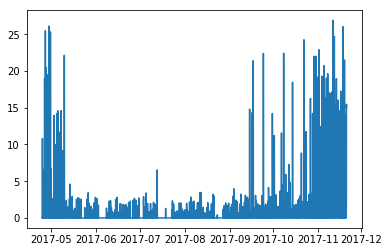

In [40]:
plt.plot(rdf['datetime'],rdf['gasPower'])
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = rdf[['T','T-1']]
y = rdf[['gasPower']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
len(X_train)

3432

In [50]:
model.score(X_test, y_test)

0.06311784760451877

In [51]:
print(model.get_params(deep=True))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


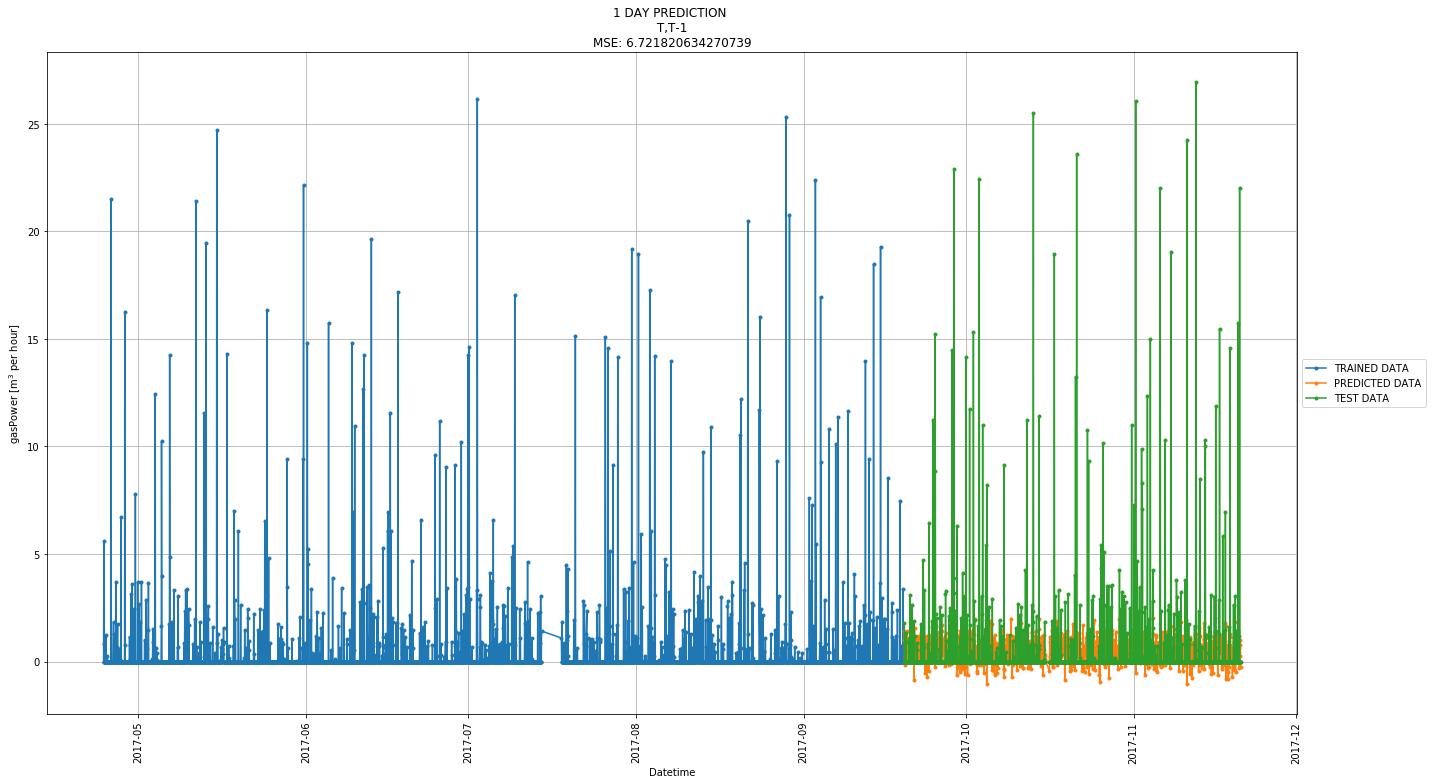

In [52]:
import matplotlib.dates
X_datetime=rdf['datetime'][:len(X_train)]
X1_datetime=rdf['datetime'][len(X_train):]
# X_datetime = matplotlib.dates.date2num(X_datetime)
# X1_datetime= matplotlib.dates.date2num(X1_datetime)


Y_prediction=model.predict(X_test)

# %matplotlib notebook
%matplotlib inline
plt.figure(figsize=(20,11))
plt.plot(X_datetime,y_train,'.-',label='TRAINED DATA')
plt.plot(X1_datetime,Y_prediction,'.-',label='PREDICTED DATA')     
plt.plot(X1_datetime,y_test,'.-',label='TEST DATA')

plt.grid(True)
plt.title('1 DAY PREDICTION \n T,T-1 \nMSE: '+ str(mean_squared_error(y_test,Y_prediction)))
plt.xlabel( 'Datetime')
plt.xticks(rotation='vertical' )
plt.ylabel('gasPower [m$^3$ per hour]')
# plt.xlim(X1_datetime[0],X1_datetime[-1])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()